In [4]:
%matplotlib inline
import random
import time

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

## Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

### Función de densidad de una variable aleatoria continua

Para una variable aleatoria continua $X$, decimos que $f_X$ es la **función de densidad** de $X$ si se verifica:

$$
P(X\in[a,b]) = \int_{a}^b \;f_X(x)\:dx
$$

Si la función de densidad corresponde a una distribución conocida, diremos:

  - "la variable aleatoria X sigue una distribución normal con media 100 y desviación típica 10."

ó 

  - "la variable aleatoria X se distribuye según una exponencial con tasa 5"

por ejemplo.

## Esperanza de una variable aleatoria continua

De forma precisa, para una variable aleatoria continua son soporte $S$, **la esperanza se define como**:
$$
E[X] = \int_S x\:f(x)
$$

Intuitivamente, la **esperanza** o **valor esperado** de una distribución de probabilidad es el **promedio** de los valores obtenidos al hacer muchas extracciones independientes:

$$
E[X] = \lim_{N\rightarrow\infty}\frac{1}{N}\Sigma_{i=1}^N \:x_i
$$


Por lo tanto, es muy fácil simular la esperanza de una VA cuya distribución no conocemos:

In [5]:
def experimento_pi():
    'Medimos el tiempo que tarda el ordenador en hacer cierto cálculo'
    tstart = time.time()
    x = sum(
        (-1)**k/(2*k+1)
        for k in range(1000)
    )
    tend = time.time()
    return tend-tstart

In [8]:
experimento_pi()

0.0003943443298339844

In [9]:
N=1000
sum(experimento_pi() for j in range(N) )/N

0.0004412987232208252

### Transformación de una variable aleatoria continua: g(X)
No vamos a detenernos a definir de forma precisa el **soporte** de una VA continua, pero podemos decir que es *el conjunto con probabilidad 1 más "pequeño" posible*.

Si
$$
X:\Omega\rightarrow \mathbb{R}
$$
es una VA continua con soporte $S$ y $g:S\rightarrow\mathbb{R}$ es una función definida en $S$, podemos definir
$$
g\circ X = g(X):\Omega\rightarrow \mathbb{R}
$$
como la composición $(g\circ X)(w) = g(X(w))$

> Si $\{x_1,\dots,x_N\}$ es una muestra aleatoria de $X$, entonces $\{g(x_1),\dots,g(x_N)\}$ es una muestra aleatoria de $g(X)$.

## Función de densidad de g(X)

Si transformamos una VA continua $X$ mediante una transformación g continua, el resultado será una VA continua.
$$
P(g(X)\in A) = \int_{A} f_{g(X)}(y) dy
$$
pero 
$$
g(X)\in A \Leftrightarrow X\in g^{-1}(A)
$$
$$
P(X\in g^{-1}(A)) = \int_{g^{-1}(A)} f_{X}(x) dx
$$
Si $g$ es inyectiva, hacemos el cambio de variable $y=g(x)$:
$$
\int_{g^{-1}(A)} f_{X}(x) dx =
\int_{A} f_{X}(g^{-1}(y)) (g^{-1})'(y) dy
$$
y deducimos, que **la función de densidad de $Y=g(X)$** es

$$
f_{g(X)}(y)=f_{X}(g^{-1}(y)) (g^{-1})'(y)
$$

*¡Esta fórmula sólo vale si g es inyectiva!*

### Ejemplo

U es una VA que se distribuye $U\sim \text{Uniforme}(1,2)$ (es decir, toma cualquier valor real entre 1 y 2 con la misma probabilidad). Mostramos un histograma de $U^2$

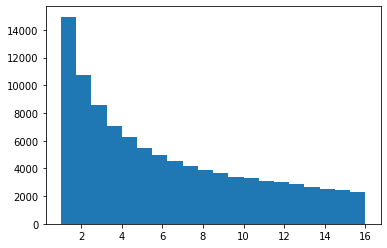

In [10]:
#Ante la duda, podemos dibujar un histograma, con las
#precauciones habituales para histogramas de VA continuas
U = st.uniform(loc=1, scale=1)
def experimento_U():
    u0 = U.rvs()
    return u0**2

muestra = [experimento_U() for j in range(100000)]
muestra2 = [t**2 for t in muestra]

plt.hist(muestra2, bins=20)
plt.show()

Observamos que si U es una Uniforme(1,2), entonces $U^2$ no parece una Uniforme($1^2, 2^2$).

Repetimos el ejercicio para la Normal(0,1)

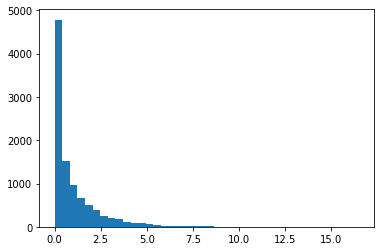

In [10]:
#Ante la duda, podemos dibujar un histograma, con las
#precauciones habituales para histogramas de VA continuas
N = st.norm(loc=0, scale=1)
def experimento_N2():
    t = N.rvs(1)[0]
    return t**2

muestra = [experimento_N2() for j in range(10000)]

plt.hist(muestra, bins=40)
plt.show()

### Esperanza de g(X)

 - ¿Cuál es la *esperanza* de la variable aleatoria $g(X)$?

Según la definición:
$$
E[g(X)] = \int_{g(S)} y\:f_{g(X)}(y) dy
$$
Regla de cálculo habitual:
$$
E[g(X)] = \int_{S} g(x)\:f_{X}(x) dx
$$
Intuición:
$$
E[g(X)] = \lim_{N\rightarrow\infty}\frac{1}{N}\Sigma_{i=1}^N \:g(x_i)
$$
para una muestra aleatoria independiente $\{x_1,\dots,x_N\}$ de $X$.

### Ejercicio

U es una VA que se distribuye según una Uniforme(1,3) (es decir, su función de densidad es constante $\frac{1}{2}$ en el intervalo $[1,3]$, y su densidad es 0 fuera de ese intervalo).

- Aproxima mediante simulaciones:

 - $E[U^2]$
 - $E[2^U]$
 
- Dibuja histogramas de $U^2$ y $2^U$.

## Varianza y desviación típica de una distribución continua

 - La **varianza** de $X$ es la esperanza de $(X - \mu)^2$:
$$
Var[X] = E[(X - \mu)^2]
$$
También se puede calcular como
$$
Var[X] = E[X^2] - E[X]^2 = E[X^2] - \mu^2
$$

Recuerda que la varianza tiene las unidades de $X$ al cuadrado.
 
 - La **desviación típica** es la raíz cuadrada de la varianza:

$$
\sigma[X] = \sqrt{Var[X]}
$$


De todas formas, podemos pedir a scipy.stats que calcule la media, la varianza y la desviación típica.

In [11]:
E = st.expon(scale=1/100)
E.mean(), E.var(), E.std()

(0.01, 0.0001, 0.01)

### Ejercicio

U sigue una distribución uniforme continua en el intervalo (10,20)

 - Calcula su media, varianza y desviación típica buscando la distribución uniforme en scipy.stats.
 - Calcula su media, varianza y desviación típica simulando la distribución.
 - Comprueba los valores buscando en la wikipedia o en un libro de texto.